## EDA - Part 1 (2020. 08. 18)

### 2016년도 ~ 2019년도 해당 시즌별 팀의 전력 분석
> OUTLINE

##### 1. 팀
- 시즌에 참여한 팀, 팀의 수

##### 2. 경기
- 홈, 원정 경기 수
- 홈, 원정 경기별 승패(승률)
- 총 경기 승패(승률)
- RANK

##### 3. 선수 시트
- 총 선수(투수/타자)
- 평균 연령(투수/타자)
- 평균 연봉(투수/타자)
- RANK

##### 4. 종합 상관관계
- 시즌 순위 - 시즌 승률 - 평균 연령 - 투수 평균 연령 - 타자 평균 연령 - 평균 연봉 - 투수 평균 연봉 - 타자 평균 연봉


#### INTRODUCTION

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#경로
PATH = "database\\"

#엑셀 파일이름
doc2016 = "2020빅콘테스트_스포츠투아이_제공데이터_2016.xlsx"
doc2017 = "2020빅콘테스트_스포츠투아이_제공데이터_2017.xlsx"
doc2018 = "2020빅콘테스트_스포츠투아이_제공데이터_2018.xlsx"
doc2019 = "2020빅콘테스트_스포츠투아이_제공데이터_2019.xlsx"

# 팀 배열
team_arr = ["HH","HT","KT","LG","LT","NC","OB","SK","SS","WO"]
total_team = len(team_arr)

#### 1. 팀

##### - 프로야구 팀  (2016 ~ 2019)

In [99]:
#2016년 시즌
doc2016_1 = pd.read_excel(PATH + doc2016, sheet_name = "1.팀")
doc2016_1
#2017년 시즌
doc2017_1 = pd.read_excel(PATH + doc2017, sheet_name = "1.팀")
doc2017_1
#2018년 시즌
doc2018_1 = pd.read_excel(PATH + doc2018, sheet_name = "1.팀")
doc2018_1
#2019년 시즌
doc2019_1 = pd.read_excel(PATH + doc2019, sheet_name = "1.팀")
doc2019_1

,T_ID,T_NM
0,HH,한화
1,HT,KIA
2,KT,KT
3,LG,LG
4,LT,롯데
5,NC,NC
6,OB,두산
7,SK,SK
8,SS,삼성
9,WO,키움


##### - 연도별 프로야구 팀 수 (2016 ~ 2019)

In [100]:
print("2016년도 프로야구 총 팀의 수 : ", doc2016_1['T_NM'].count())
print("2017년도 프로야구 총 팀의 수 : ", doc2017_1['T_NM'].count())
print("2018년도 프로야구 총 팀의 수 : ", doc2018_1['T_NM'].count())
print("2019년도 프로야구 총 팀의 수 : ", doc2019_1['T_NM'].count())

2016년도 프로야구 총 팀의 수 :  10
2017년도 프로야구 총 팀의 수 :  10
2018년도 프로야구 총 팀의 수 :  10
2019년도 프로야구 총 팀의 수 :  10


#### 2. 경기

In [101]:
#2016년 시즌
doc2016_2 = pd.read_excel(PATH + doc2016, sheet_name = "2.경기")
doc2016_4 = pd.read_excel(PATH + doc2016, sheet_name = "4.팀투수")


#2017년 시즌
doc2017_2 = pd.read_excel(PATH + doc2017, sheet_name = "2.경기")
doc2017_4 = pd.read_excel(PATH + doc2017, sheet_name = "4.팀투수")


#2018년 시즌
doc2018_2 = pd.read_excel(PATH + doc2018, sheet_name = "2.경기")
doc2018_4 = pd.read_excel(PATH + doc2018, sheet_name = "4.팀투수")


#2019년 시즌
doc2019_2 = pd.read_excel(PATH + doc2019, sheet_name = "2.경기")
doc2019_4 = pd.read_excel(PATH + doc2019, sheet_name = "4.팀투수")

# 견본 출력
doc2017_2.head()


,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM
0,20170331HHOB0,20170331,HH,OB,0,금,잠실
1,20170331HTSS0,20170331,HT,SS,0,금,대구
2,20170331KTSK0,20170331,KT,SK,0,금,문학
3,20170331LGWO0,20170331,LG,WO,0,금,고척
4,20170331LTNC0,20170331,LT,NC,0,금,마산


##### - 시즌 별 팀 경기 변수
* 2016년도 홈 / 원정 경기 / 팀별[승,무,패] / 팀별[전체 승률, 홈 승률, 원정 승률] / 랭크
* 2017년도 홈 / 원정 경기 / 팀별[승,무,패] / 팀별[전체 승률, 홈 승률, 원정 승률] / 랭크
* 2018년도 홈 / 원정 경기 / 팀별[승,무,패] / 팀별[전체 승률, 홈 승률, 원정 승률] / 랭크
* 2019년도 홈 / 원정 경기 / 팀별[승,무,패] / 팀별[전체 승률, 홈 승률, 원정 승률] / 랭크

In [102]:
#-------------------------------------------------------------------------------------------------------------------
#2016년 시즌
home_arr_2016 = [0,0,0,0,0,0,0,0,0,0]     #홈 경기
away_arr_2016 = [0,0,0,0,0,0,0,0,0,0]     #원정 경기
home_error_index_2016 = []                #홈 경기 데이터 에러 발생 위치
away_error_index_2016 = []                #원정 경기 데이터 에러 발생 위치
#dh_arr_2016 = [0,0,0,0,0,0,0,0,0,0]      #더블 헤어 경기
#팀명_시즌 = [홈경기[승,무,패], 원정경기[승,무,패]]
HH_2016 = [[0,0,0],[0,0,0]]
HT_2016 = [[0,0,0],[0,0,0]]
KT_2016 = [[0,0,0],[0,0,0]]
LG_2016 = [[0,0,0],[0,0,0]]
LT_2016 = [[0,0,0],[0,0,0]]
NC_2016 = [[0,0,0],[0,0,0]]
OB_2016 = [[0,0,0],[0,0,0]]
SK_2016 = [[0,0,0],[0,0,0]]
SS_2016 = [[0,0,0],[0,0,0]]
WO_2016 = [[0,0,0],[0,0,0]]
result_arr_2016 = [HH_2016, HT_2016, KT_2016, LG_2016, LT_2016, NC_2016, OB_2016, SK_2016, SS_2016, WO_2016]
#팀명_승률_시즌 = [전체 승률, 홈 승률, 원정 승률]
HH_rate_2016 = [0,0,0]
HT_rate_2016 = [0,0,0]
KT_rate_2016 = [0,0,0]
LG_rate_2016 = [0,0,0]
LT_rate_2016 = [0,0,0]
NC_rate_2016 = [0,0,0]
OB_rate_2016 = [0,0,0]
SK_rate_2016 = [0,0,0]
SS_rate_2016 = [0,0,0]
WO_rate_2016 = [0,0,0]
result_arr_rate_2016 = [HH_rate_2016, HT_rate_2016, KT_rate_2016, LG_rate_2016, LT_rate_2016, 
                        NC_rate_2016, OB_rate_2016, SK_rate_2016, SS_rate_2016, WO_rate_2016]
#랭크
result_arr_rank_2016 = [0,0,0,0,0,0,0,0,0,0]
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2017년 시즌
home_arr_2017 = [0,0,0,0,0,0,0,0,0,0]     #홈 경기
away_arr_2017 = [0,0,0,0,0,0,0,0,0,0]     #원정 경기
home_error_index_2017 = []                #홈 경기 데이터 에러 발생 위치
away_error_index_2017 = []                #원정 경기 데이터 에러 발생 위치
#dh_arr_2017 = [0,0,0,0,0,0,0,0,0,0]      #더블 헤어 경기
#팀명_시즌 = [홈경기[승,무,패], 원정경기[승,무,패]]
HH_2017 = [[0,0,0],[0,0,0]]
HT_2017 = [[0,0,0],[0,0,0]]
KT_2017 = [[0,0,0],[0,0,0]]
LG_2017 = [[0,0,0],[0,0,0]]
LT_2017 = [[0,0,0],[0,0,0]]
NC_2017 = [[0,0,0],[0,0,0]]
OB_2017 = [[0,0,0],[0,0,0]]
SK_2017 = [[0,0,0],[0,0,0]]
SS_2017 = [[0,0,0],[0,0,0]]
WO_2017 = [[0,0,0],[0,0,0]]
result_arr_2017 = [HH_2017, HT_2017, KT_2017, LG_2017, LT_2017, NC_2017, OB_2017, SK_2017, SS_2017, WO_2017]
#팀명_승률_시즌 = [전체 승률, 홈 승률, 원정 승률]
HH_rate_2017 = [0,0,0]
HT_rate_2017 = [0,0,0]
KT_rate_2017 = [0,0,0]
LG_rate_2017 = [0,0,0]
LT_rate_2017 = [0,0,0]
NC_rate_2017 = [0,0,0]
OB_rate_2017 = [0,0,0]
SK_rate_2017 = [0,0,0]
SS_rate_2017 = [0,0,0]
WO_rate_2017 = [0,0,0]
result_arr_rate_2017 = [HH_rate_2017, HT_rate_2017, KT_rate_2017, LG_rate_2017, LT_rate_2017, 
                        NC_rate_2017, OB_rate_2017, SK_rate_2017, SS_rate_2017, WO_rate_2017]
#랭크
result_arr_rank_2017 = [0,0,0,0,0,0,0,0,0,0]
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2018년 시즌
home_arr_2018 = [0,0,0,0,0,0,0,0,0,0]     #홈 경기
away_arr_2018 = [0,0,0,0,0,0,0,0,0,0]     #원정 경기
home_error_index_2018 = []                #홈 경기 데이터 에러 발생 위치
away_error_index_2018 = []                #원정 경기 데이터 에러 발생 위치
#dh_arr_2018 = [0,0,0,0,0,0,0,0,0,0]      #더블 헤어 경기
#팀명_시즌 = [홈경기[승,무,패], 원정경기[승,무,패]]
HH_2018 = [[0,0,0],[0,0,0]]
HT_2018 = [[0,0,0],[0,0,0]]
KT_2018 = [[0,0,0],[0,0,0]]
LG_2018 = [[0,0,0],[0,0,0]]
LT_2018 = [[0,0,0],[0,0,0]]
NC_2018 = [[0,0,0],[0,0,0]]
OB_2018 = [[0,0,0],[0,0,0]]
SK_2018 = [[0,0,0],[0,0,0]]
SS_2018 = [[0,0,0],[0,0,0]]
WO_2018 = [[0,0,0],[0,0,0]]
result_arr_2018 = [HH_2018, HT_2018, KT_2018, LG_2018, LT_2018, NC_2018, OB_2018, SK_2018, SS_2018, WO_2018]
#팀명_승률_시즌 = [전체 승률, 홈 승률, 원정 승률]
HH_rate_2018 = [0,0,0]
HT_rate_2018 = [0,0,0]
KT_rate_2018 = [0,0,0]
LG_rate_2018 = [0,0,0]
LT_rate_2018 = [0,0,0]
NC_rate_2018 = [0,0,0]
OB_rate_2018 = [0,0,0]
SK_rate_2018 = [0,0,0]
SS_rate_2018 = [0,0,0]
WO_rate_2018 = [0,0,0]
result_arr_rate_2018 = [HH_rate_2018, HT_rate_2018, KT_rate_2018, LG_rate_2018, LT_rate_2018, 
                        NC_rate_2018, OB_rate_2018, SK_rate_2018, SS_rate_2018, WO_rate_2018]
#랭크
result_arr_rank_2018 = [0,0,0,0,0,0,0,0,0,0]
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2019년 시즌
home_arr_2019 = [0,0,0,0,0,0,0,0,0,0]     #홈 경기
away_arr_2019 = [0,0,0,0,0,0,0,0,0,0]     #원정 경기
home_error_index_2019 = []                #홈 경기 데이터 에러 발생 위치
away_error_index_2019 = []                #원정 경기 데이터 에러 발생 위치
#dh_arr_2019 = [0,0,0,0,0,0,0,0,0,0]      #더블 헤어 경기
#팀명_시즌 = [홈경기[승,무,패], 원정경기[승,무,패]]
HH_2019 = [[0,0,0],[0,0,0]]
HT_2019 = [[0,0,0],[0,0,0]]
KT_2019 = [[0,0,0],[0,0,0]]
LG_2019 = [[0,0,0],[0,0,0]]
LT_2019 = [[0,0,0],[0,0,0]]
NC_2019 = [[0,0,0],[0,0,0]]
OB_2019 = [[0,0,0],[0,0,0]]
SK_2019 = [[0,0,0],[0,0,0]]
SS_2019 = [[0,0,0],[0,0,0]]
WO_2019 = [[0,0,0],[0,0,0]]
result_arr_2019 = [HH_2019, HT_2019, KT_2019, LG_2019, LT_2019, NC_2019, OB_2019, SK_2019, SS_2019, WO_2019]
#팀명_승률_시즌 = [전체 승률, 홈 승률, 원정 승률]
HH_rate_2019 = [0,0,0]
HT_rate_2019 = [0,0,0]
KT_rate_2019 = [0,0,0]
LG_rate_2019 = [0,0,0]
LT_rate_2019 = [0,0,0]
NC_rate_2019 = [0,0,0]
OB_rate_2019 = [0,0,0]
SK_rate_2019 = [0,0,0]
SS_rate_2019 = [0,0,0]
WO_rate_2019 = [0,0,0]
result_arr_rate_2019 = [HH_rate_2019, HT_rate_2019, KT_rate_2019, LG_rate_2019, LT_rate_2019, 
                        NC_rate_2019, OB_rate_2019, SK_rate_2019, SS_rate_2019, WO_rate_2019]
#랭크
result_arr_rank_2019 = [0,0,0,0,0,0,0,0,0,0]
#-------------------------------------------------------------------------------------------------------------------

##### - 경기 함수
* 홈 경기 카운트 함수
* 원정 경기 카운트 함수
* 홈/원정 경기 출력
* 경기 결과 업데이트 함수
* 팀별 경기 결과 업데이트 함수
* 경기 종합 출력 함수
* 승률 업데이트 함수
* 랭크 업데이트 함수


In [103]:
def count_home_match(doc, arr, err):
    match = doc["HOME_KEY"].count()
    for i in range(match):
        target = doc["HOME_KEY"][i]
        if (target == "HH"):
            arr[0]+= 1
        elif (target == "HT"):
            arr[1]+= 1
        elif (target == "KT"):
            arr[2]+= 1
        elif (target == "LG"):
            arr[3]+= 1
        elif (target == "LT"):
            arr[4]+= 1
        elif (target == "NC"):
            arr[5]+= 1
        elif (target == "OB"):
            arr[6]+= 1
        elif (target == "SK"):
            arr[7]+= 1
        elif (target == "SS"):
            arr[8]+= 1
        elif (target == "WO"):
            arr[9]+= 1
        else:
            err.append(i)

            
def count_away_match(doc, arr, err):
    match = doc["VISIT_KEY"].count()
    for i in range(match):
        target = doc["VISIT_KEY"][i]
        if (target == "HH"):
            arr[0]+= 1
        elif (target == "HT"):
            arr[1]+= 1
        elif (target == "KT"):
            arr[2]+= 1
        elif (target == "LG"):
            arr[3]+= 1
        elif (target == "LT"):
            arr[4]+= 1
        elif (target == "NC"):
            arr[5]+= 1
        elif (target == "OB"):
            arr[6]+= 1
        elif (target == "SK"):
            arr[7]+= 1
        elif (target == "SS"):
            arr[8]+= 1
        elif (target == "WO"):
            arr[9]+= 1
        else:
            err.append(i)

            
def print_match(home, away, err_home, err_away):
    if (len(err_home) == 0 and len(err_away) == 0):
        print("----- 경기 수 -----")
        for i in range(10):
            print ("|" + team_arr[i] + "| ","Home:",home[i], "Away", away[i])
    else:
        print("Error data index")
        print(err_home)
        print(err_away)


def update_result(team, inhome, result, arr):
    if (inhome == True):
        if (result == "W"):
            arr[team][0][0]+= 1
        elif (result == "D"):
            arr[team][0][1]+= 1
        elif (result == "L"):
            arr[team][0][2]+= 1
    elif (inhome == False):
        if (result == "W"):
            arr[team][1][0]+= 1
        elif (result == "D"):
            arr[team][1][1]+= 1
        elif (result == "L"):
            arr[team][1][2]+= 1


def team_result(doc, arr):
    count = len(doc["T_ID"])
    home = False                    # 홈, 어웨이 경기 구분
    
    for i in range(count):
        target = doc["T_ID"][i]     # 팀
        result = doc["WLS"][i]      # 결과
        home = not home
        
        if (target == "HH"):
            update_result(0, home, result, arr) 
        elif (target == "HT"):
            update_result(1, home, result, arr)
        elif (target == "KT"):
            update_result(2, home, result, arr)
        elif (target == "LG"):
            update_result(3, home, result, arr)
        elif (target == "LT"):
            update_result(4, home, result, arr)
        elif (target == "NC"):
            update_result(5, home, result, arr)
        elif (target == "OB"):
            update_result(6, home, result, arr)
        elif (target == "SK"):
            update_result(7, home, result, arr)
        elif (target == "SS"):
            update_result(8, home, result, arr)
        elif (target == "WO"):
            update_result(9, home, result, arr)

            
def match(doc, home_arr, away_arr, home_error_index, away_error_index):
    count_home_match(doc, home_arr, home_error_index)
    count_away_match(doc, away_arr, away_error_index)
    #print_match(home_arr, away_arr, home_error_index, away_error_index)


# 홈경기 승무패, 원정경기 승무패, 총경기 승무패
# 승률은 승/(승 + 패)로 계산 (무승부는 상관 없다)
# PREREQUISITE: 해당 시즌의 경기 결과 (result_arr)가 먼저 정리되어야 한다.
def update_winning_rate(result_arr, result_arr_rate):
    for i in range(total_team):
        total_rate = round((result_arr[i][0][0] + result_arr[i][1][0]) / 
                           (result_arr[i][0][0] + result_arr[i][0][2] + result_arr[i][1][0] + result_arr[i][1][2]), 3)
        home_rate = round(result_arr[i][0][0] / (result_arr[i][0][0] + result_arr[i][0][2]), 3)
        away_rate = round(result_arr[i][1][0] / (result_arr[i][1][0] + result_arr[i][1][2]), 3)
        result_arr_rate[i][0] = total_rate
        result_arr_rate[i][1] = home_rate
        result_arr_rate[i][2] = away_rate


# rank는 0에서 시작 자신보다 높거나 같은게 있으면 +1씩해서 등수를 담는 array를 업데이트 하는 함수는 작성
def update_rank(result_arr_rate, result_arr_rank):
    for i in range(total_team):
        cursor = result_arr_rate[i][0]
        for j in range(total_team):
            if (cursor <= result_arr_rate[j][0]):
                result_arr_rank[i]+= 1

                
#사용 예시 순서
#match(doc2016_2, home_arr_2016, away_arr_2016, home_error_index_2016, away_error_index_2016)
#team_result(doc2016_4, result_arr_2016)
#update_winning_rate(result_arr_2016, result_arr_rate_2016)
#update_rank(result_arr_rate_2016, result_arr_rank_2016)

##### - 경기 변수 출력 결과
* 전체 시즌 (2016 ~ 2019)

In [104]:
#2016 시즌

match(doc2016_2, home_arr_2016, away_arr_2016, home_error_index_2016, away_error_index_2016)
team_result(doc2016_4, result_arr_2016)
update_winning_rate(result_arr_2016, result_arr_rate_2016)
update_rank(result_arr_rate_2016, result_arr_rank_2016)


print("- 2016 시즌 결과")
print("| 팀 |  | 홈 경기 ||승||무||패||홈 승률|    |원정 경기||승|무|패||원정 승률|    | 전체 경기 ||승||무||패||종합 승률||등수|" )
for i in range(total_team):
    if (len(home_error_index_2016) != 0 or len(away_error_index_2016) != 0):
        print("data error (2016)...!")
    else:
        team_name = team_arr[i]
        home_count = home_arr_2016[i]
        away_count = away_arr_2016[i]
        home_match = result_arr_2016[i][0]
        home_win = home_match[0]
        home_draw = home_match[1]
        home_lose = home_match[2]
        away_match = result_arr_2016[i][1]
        away_win = away_match[0]
        away_draw = away_match[1]
        away_lose = away_match[2]
        total_rate = result_arr_rate_2016[i][0]
        home_rate = result_arr_rate_2016[i][1]
        away_rate = result_arr_rate_2016[i][2]
        rank = result_arr_rank_2016[i]
        print("| " + team_name + " |   HOME:", home_count, home_match, home_rate, "         AWAY:", away_count, away_match, away_rate,
             "         TOTAL:", home_count + away_count, " ", home_win + away_win, " ", home_draw + away_draw, " ", home_lose + away_lose, " ",total_rate, " ", rank)
        
print("\n")
print("\n")
#2017시즌

match(doc2017_2, home_arr_2017, away_arr_2017, home_error_index_2017, away_error_index_2017)
team_result(doc2017_4, result_arr_2017)
update_winning_rate(result_arr_2017, result_arr_rate_2017)
update_rank(result_arr_rate_2017, result_arr_rank_2017)


print("- 2017 시즌 결과")
print("| 팀 |  | 홈 경기 ||승||무||패||홈 승률|    |원정 경기||승|무|패||원정 승률|    | 전체 경기 ||승||무||패||종합 승률||등수|" )
for i in range(total_team):
    if (len(home_error_index_2017) != 0 or len(away_error_index_2017) != 0):
        print("data error (2017)...!")
    else:
        team_name = team_arr[i]
        home_count = home_arr_2017[i]
        away_count = away_arr_2017[i]
        home_match = result_arr_2017[i][0]
        home_win = home_match[0]
        home_draw = home_match[1]
        home_lose = home_match[2]
        away_match = result_arr_2017[i][1]
        away_win = away_match[0]
        away_draw = away_match[1]
        away_lose = away_match[2]
        total_rate = result_arr_rate_2017[i][0]
        home_rate = result_arr_rate_2017[i][1]
        away_rate = result_arr_rate_2017[i][2]
        rank = result_arr_rank_2017[i]
        print("| " + team_name + " |   HOME:", home_count, home_match, home_rate, "         AWAY:", away_count, away_match, away_rate,
             "         TOTAL:", home_count + away_count, " ", home_win + away_win, " ", home_draw + away_draw, " ", home_lose + away_lose, " ",total_rate, " ", rank)
        
print("\n")
print("\n")
#2018시즌

match(doc2018_2, home_arr_2018, away_arr_2018, home_error_index_2018, away_error_index_2018)
team_result(doc2018_4, result_arr_2018)
update_winning_rate(result_arr_2018, result_arr_rate_2018)
update_rank(result_arr_rate_2018, result_arr_rank_2018)


print("- 2018 시즌 결과")
print("| 팀 |  | 홈 경기 ||승||무||패||홈 승률|    |원정 경기||승|무|패||원정 승률|    | 전체 경기 ||승||무||패||종합 승률||등수|" )
for i in range(total_team):
    if (len(home_error_index_2018) != 0 or len(away_error_index_2018) != 0):
        print("data error (2018)...!")
    else:
        team_name = team_arr[i]
        home_count = home_arr_2018[i]
        away_count = away_arr_2018[i]
        home_match = result_arr_2018[i][0]
        home_win = home_match[0]
        home_draw = home_match[1]
        home_lose = home_match[2]
        away_match = result_arr_2018[i][1]
        away_win = away_match[0]
        away_draw = away_match[1]
        away_lose = away_match[2]
        total_rate = result_arr_rate_2018[i][0]
        home_rate = result_arr_rate_2018[i][1]
        away_rate = result_arr_rate_2018[i][2]
        rank = result_arr_rank_2018[i]
        print("| " + team_name + " |   HOME:", home_count, home_match, home_rate, "         AWAY:", away_count, away_match, away_rate,
             "         TOTAL:", home_count + away_count, " ", home_win + away_win, " ", home_draw + away_draw, " ", home_lose + away_lose, " ",total_rate, " ", rank)
print("\n")
print("\n")
#2019시즌

match(doc2019_2, home_arr_2019, away_arr_2019, home_error_index_2019, away_error_index_2019)
team_result(doc2019_4, result_arr_2019)
update_winning_rate(result_arr_2019, result_arr_rate_2019)
update_rank(result_arr_rate_2019, result_arr_rank_2019)


print("- 2019 시즌 결과")
print("| 팀 |  | 홈 경기 ||승||무||패||홈 승률|    |원정 경기||승|무|패||원정 승률|    | 전체 경기 ||승||무||패||종합 승률||등수|" )
for i in range(total_team):
    if (len(home_error_index_2019) != 0 or len(away_error_index_2019) != 0):
        print("data error (2019)...!")
    else:
        team_name = team_arr[i]
        home_count = home_arr_2019[i]
        away_count = away_arr_2019[i]
        home_match = result_arr_2019[i][0]
        home_win = home_match[0]
        home_draw = home_match[1]
        home_lose = home_match[2]
        away_match = result_arr_2019[i][1]
        away_win = away_match[0]
        away_draw = away_match[1]
        away_lose = away_match[2]
        total_rate = result_arr_rate_2019[i][0]
        home_rate = result_arr_rate_2019[i][1]
        away_rate = result_arr_rate_2019[i][2]
        rank = result_arr_rank_2019[i]
        print("| " + team_name + " |   HOME:", home_count, home_match, home_rate, "         AWAY:", away_count, away_match, away_rate,
             "         TOTAL:", home_count + away_count, " ", home_win + away_win, " ", home_draw + away_draw, " ", home_lose + away_lose, " ",total_rate, " ", rank)

- 2016 시즌 결과
| 팀 |  | 홈 경기 ||승||무||패||홈 승률|    |원정 경기||승|무|패||원정 승률|    | 전체 경기 ||승||무||패||종합 승률||등수|
| HH |   HOME: 72 [36, 2, 34] 0.514          AWAY: 72 [30, 1, 41] 0.423          TOTAL: 144   66   3   75   0.468   7
| HT |   HOME: 72 [38, 0, 34] 0.528          AWAY: 72 [32, 1, 39] 0.451          TOTAL: 144   70   1   73   0.49   5
| KT |   HOME: 72 [28, 0, 44] 0.389          AWAY: 72 [25, 2, 45] 0.357          TOTAL: 144   53   2   89   0.373   10
| LG |   HOME: 72 [40, 2, 30] 0.571          AWAY: 72 [31, 0, 41] 0.431          TOTAL: 144   71   2   71   0.5   4
| LT |   HOME: 72 [40, 0, 32] 0.556          AWAY: 72 [26, 0, 46] 0.361          TOTAL: 144   66   0   78   0.458   8
| NC |   HOME: 72 [39, 2, 31] 0.557          AWAY: 72 [44, 1, 27] 0.62          TOTAL: 144   83   3   58   0.589   2
| OB |   HOME: 72 [46, 1, 25] 0.648          AWAY: 72 [47, 0, 25] 0.653          TOTAL: 144   93   1   50   0.65   1
| SK |   HOME: 72 [35, 0, 37] 0.486          AWAY: 72 [34, 0, 38] 0.472     

#### 3. 선수

In [105]:
doc2016_3 = pd.read_excel(PATH + doc2016, sheet_name = "3.선수")

doc2017_3 = pd.read_excel(PATH + doc2017, sheet_name = "3.선수")

doc2018_3 = pd.read_excel(PATH + doc2018, sheet_name = "3.선수")

doc2019_3 = pd.read_excel(PATH + doc2019, sheet_name = "3.선수")

#견본 출력
doc2017_3.head()

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2017,60100,백창수,LG,외,29,4200만원
1,2017,60105,배민관,LG,투,26,3000만원
2,2017,60140,신정락,LG,투,30,7500만원
3,2017,60146,이승현,SS,투,26,6200만원
4,2017,60164,유경국,LG,투,26,3000만원


##### - 시즌 별 선수 변수
* 2016년도 총 선수[투수 수, 타자 수] / 전체 평균 연령[투수 평균 연령, 타자 평균 연령] / 전체 평균 연봉[투수 평균 연봉, 타자 평균 연봉] 
* 2017년도 총 선수[투수 수, 타자 수] / 전체 평균 연령[투수 평균 연령, 타자 평균 연령] / 전체 평균 연봉[투수 평균 연봉, 타자 평균 연봉] 
* 2018년도 총 선수[투수 수, 타자 수] / 전체 평균 연령[투수 평균 연령, 타자 평균 연령] / 전체 평균 연봉[투수 평균 연봉, 타자 평균 연봉] 
* 2019년도 총 선수[투수 수, 타자 수] / 전체 평균 연령[투수 평균 연령, 타자 평균 연령] / 전체 평균 연봉[투수 평균 연봉, 타자 평균 연봉] 

In [106]:
#-------------------------------------------------------------------------------------------------------------------
#2016년 시즌
player_arr_2016 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 전체 선수 수
pitcher_arr_2016 = [0,0,0,0,0,0,0,0,0,0]         #각 팀 투수의 수
hitter_arr_2016 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 타자의 수
player_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 전체 선수의 총 나이 => 평균 나이로 변환
pitcher_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]     #각 팀 투수의 총 나이 => 평균나이로 변환
hitter_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 타자의 총 나이 => 평균나이로 변환
player_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 전체 선수의 연봉 총합 => 평균 연봉으로 변환 
hitter_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 타자의 연봉 총합 => 평균 연봉으로 변환
pitcher_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]   #각 팀 투수의 연봉 총합 => 평균 연봉으로 변환
total_player_2016 = doc2016_3["PCODE"].count()   #해당 시즌에 참여한 모든 선수의 수
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2017년 시즌
player_arr_2017 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 전체 선수 수
pitcher_arr_2017 = [0,0,0,0,0,0,0,0,0,0]         #각 팀 투수의 수
hitter_arr_2017 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 타자의 수
player_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 전체 선수의 총 나이 => 평균 나이로 변환
pitcher_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]     #각 팀 투수의 총 나이 => 평균나이로 변환
hitter_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 타자의 총 나이 => 평균나이로 변환
player_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 전체 선수의 연봉 총합 => 평균 연봉으로 변환 
hitter_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 타자의 연봉 총합 => 평균 연봉으로 변환
pitcher_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]   #각 팀 투수의 연봉 총합 => 평균 연봉으로 변환
total_player_2017 = doc2017_3["PCODE"].count()   #해당 시즌에 참여한 모든 선수의 수
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2018년 시즌
player_arr_2018 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 전체 선수 수
pitcher_arr_2018 = [0,0,0,0,0,0,0,0,0,0]         #각 팀 투수의 수
hitter_arr_2018 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 타자의 수
player_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 전체 선수의 총 나이 => 평균 나이로 변환
pitcher_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]     #각 팀 투수의 총 나이 => 평균나이로 변환
hitter_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 타자의 총 나이 => 평균나이로 변환
player_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 전체 선수의 연봉 총합 => 평균 연봉으로 변환 
hitter_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 타자의 연봉 총합 => 평균 연봉으로 변환
pitcher_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]   #각 팀 투수의 연봉 총합 => 평균 연봉으로 변환
total_player_2018 = doc2018_3["PCODE"].count()   #해당 시즌에 참여한 모든 선수의 수
#-------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------
#2019년 시즌
player_arr_2019 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 전체 선수 수
pitcher_arr_2019 = [0,0,0,0,0,0,0,0,0,0]         #각 팀 투수의 수
hitter_arr_2019 = [0,0,0,0,0,0,0,0,0,0]          #각 팀 타자의 수
player_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 전체 선수의 총 나이 => 평균 나이로 변환
pitcher_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]     #각 팀 투수의 총 나이 => 평균나이로 변환
hitter_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]      #각 팀 타자의 총 나이 => 평균나이로 변환
player_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 전체 선수의 연봉 총합 => 평균 연봉으로 변환 
hitter_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]    #각 팀 타자의 연봉 총합 => 평균 연봉으로 변환
pitcher_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]   #각 팀 투수의 연봉 총합 => 평균 연봉으로 변환
total_player_2019 = doc2019_3["PCODE"].count()   #해당 시즌에 참여한 모든 선수의 수
#-------------------------------------------------------------------------------------------------------------------

##### - 선수 함수
* 선수 수/나이/연봉 업데이트

In [107]:
def update_player(team, value, age, money, player_arr, pitcher_arr, hitter_arr, 
                  player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr):
    if (value == "내"):
        player_arr[team]+= 1
        hitter_arr[team]+= 1
        player_age_arr[team]+= age
        hitter_age_arr[team]+= age
        player_money_arr[team]+= money
        hitter_money_arr[team]+= money
    elif (value == "외"):
        player_arr[team]+= 1
        hitter_arr[team]+= 1
        player_age_arr[team]+= age
        hitter_age_arr[team]+= age
        player_money_arr[team]+= money
        hitter_money_arr[team]+= money
    elif (value == "포"):
        player_arr[team]+= 1
        hitter_arr[team]+= 1
        player_age_arr[team]+= age
        hitter_age_arr[team]+= age
        player_money_arr[team]+= money
        hitter_money_arr[team]+= money
    elif (value == "투"):
        player_arr[team]+= 1
        pitcher_arr[team]+= 1
        player_age_arr[team]+= age
        pitcher_age_arr[team]+= age
        player_money_arr[team]+= money
        pitcher_money_arr[team]+= money
    else:
        print("position error");

def update_teamplayer(doc, total_player, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr):

    for i in range(total_player):
        target = doc["T_ID"][i]
        target_position = doc["POSITION"][i]
        target_age = doc2016_3["AGE_VA"][i]
        str_money = str(doc2016_3["MONEY"][i])       #선수 연봉 데이터는 문자, 단위는 원, 달러, 엔이다.
        target_money = 0
        if (str_money[-1] == "원"):                  #NULL데이터는 검색을 통해 채워준다.
            money = int(str_money[:-2])               #모든 화폐를 한화(만 원) 단위로 변환하여 합한다. 
            target_money = money
        elif (str_money[-1] == "러"):
            money = int(str_money[:-2])
            target_money = money * 0.1
        elif (str_money[-1] == "엔"):
            money = int(str_money[:-1])
            target_money = int(money / 1010.95)
    
    
        if (target == "HH"):
            update_player(0, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "HT"):
            update_player(1, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "KT"):
            update_player(2, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "LG"):
            update_player(3, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "LT"):
            update_player(4, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "NC"):
            update_player(5, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "OB"):
            update_player(6, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "SK"):
            update_player(7, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "SS"):
            update_player(8, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)
        elif (target == "WO"):
            update_player(9, target_position, target_age, target_money, player_arr, pitcher_arr, hitter_arr, player_age_arr,pitcher_age_arr, hitter_age_arr,
                      player_money_arr, pitcher_money_arr, hitter_money_arr)

            


In [108]:
#2016 시즌
update_teamplayer(doc2016_3, total_player_2016, player_arr_2016, pitcher_arr_2016, hitter_arr_2016, player_age_arr_2016, pitcher_age_arr_2016, hitter_age_arr_2016,
                      player_money_arr_2016, pitcher_money_arr_2016, hitter_money_arr_2016)

#2017 시즌
update_teamplayer(doc2017_3, total_player_2017, player_arr_2017, pitcher_arr_2017, hitter_arr_2017, player_age_arr_2017, pitcher_age_arr_2017, hitter_age_arr_2017,
                      player_money_arr_2017, pitcher_money_arr_2017, hitter_money_arr_2017)

#2018 시즌
update_teamplayer(doc2018_3, total_player_2018, player_arr_2018, pitcher_arr_2018, hitter_arr_2018, player_age_arr_2018, pitcher_age_arr_2018, hitter_age_arr_2018,
                      player_money_arr_2018, pitcher_money_arr_2018, hitter_money_arr_2018)

#2019 시즌
update_teamplayer(doc2019_3, total_player_2019, player_arr_2019, pitcher_arr_2019, hitter_arr_2019, player_age_arr_2019, pitcher_age_arr_2019, hitter_age_arr_2019,
                      player_money_arr_2019, pitcher_money_arr_2019, hitter_money_arr_2019)

##### -선수 변수 출력 결과

In [109]:
#2016 시즌
print("- 2016 시즌 결과")
print("| 팀 |  |총선수||투수||타자|    |평균 연령||투수 평균||타자 평균|    |평균 연봉||투수 평균||타자 평균|    |시즌 순위|" )
for i in range (total_team):
    print("|", team_arr[i], "|  ", player_arr_2016[i], "  ", pitcher_arr_2016[i], "  ", hitter_arr_2016[i], 
         "         ", round((player_age_arr_2016[i] / player_arr_2016[i]),2), "  ", round((pitcher_age_arr_2016[i] / pitcher_arr_2016[i]),2), "  ", round((hitter_age_arr_2016[i] / hitter_arr_2016[i]),2),
         "         ", round((player_money_arr_2016[i] / player_arr_2016[i]),2), "  ", round((pitcher_money_arr_2016[i] / pitcher_arr_2016[i]),2), "  ", round((hitter_money_arr_2016[i] / hitter_arr_2016[i]),2),
         "         ", result_arr_rank_2016[i])
    
print("\n")
print("\n")
#2017 시즌
print("- 2017 시즌 결과")
print("| 팀 |  |총선수||투수||타자|    |평균 연령||투수 평균||타자 평균|    |평균 연봉||투수 평균||타자 평균|    |시즌 순위|" )
for i in range (total_team):
    print("|", team_arr[i], "|  ", player_arr_2017[i], "  ", pitcher_arr_2017[i], "  ", hitter_arr_2017[i], 
         "         ", round((player_age_arr_2017[i] / player_arr_2017[i]),2), "  ", round((pitcher_age_arr_2017[i] / pitcher_arr_2017[i]),2), "  ", round((hitter_age_arr_2017[i] / hitter_arr_2017[i]),2),
         "         ", round((player_money_arr_2017[i] / player_arr_2017[i]),2), "  ", round((pitcher_money_arr_2017[i] / pitcher_arr_2017[i]),2), "  ", round((hitter_money_arr_2017[i] / hitter_arr_2017[i]),2),
         "         ", result_arr_rank_2017[i])

print("\n")
print("\n")
#2018 시즌
print("- 2018 시즌 결과")
print("| 팀 |  |총선수||투수||타자|    |평균 연령||투수 평균||타자 평균|    |평균 연봉||투수 평균||타자 평균|    |시즌 순위|" )
for i in range (total_team):
    print("|", team_arr[i], "|  ", player_arr_2018[i], "  ", pitcher_arr_2018[i], "  ", hitter_arr_2018[i], 
         "         ", round((player_age_arr_2018[i] / player_arr_2018[i]),2), "  ", round((pitcher_age_arr_2018[i] / pitcher_arr_2018[i]),2), "  ", round((hitter_age_arr_2018[i] / hitter_arr_2018[i]),2),
         "         ", round((player_money_arr_2018[i] / player_arr_2018[i]),2), "  ", round((pitcher_money_arr_2018[i] / pitcher_arr_2018[i]),2), "  ", round((hitter_money_arr_2018[i] / hitter_arr_2018[i]),2),
         "         ", result_arr_rank_2018[i])

print("\n")
print("\n")
#2019 시즌
print("- 2019 시즌 결과")
print("| 팀 |  |총선수||투수||타자|    |평균 연령||투수 평균||타자 평균|    |평균 연봉||투수 평균||타자 평균|    |시즌 순위|" )
for i in range (total_team):
    print("|", team_arr[i], "|  ", player_arr_2019[i], "  ", pitcher_arr_2019[i], "  ", hitter_arr_2019[i], 
         "         ", round((player_age_arr_2019[i] / player_arr_2019[i]),2), "  ", round((pitcher_age_arr_2019[i] / pitcher_arr_2019[i]),2), "  ", round((hitter_age_arr_2019[i] / hitter_arr_2019[i]),2),
         "         ", round((player_money_arr_2019[i] / player_arr_2019[i]),2), "  ", round((pitcher_money_arr_2019[i] / pitcher_arr_2019[i]),2), "  ", round((hitter_money_arr_2019[i] / hitter_arr_2019[i]),2),
         "         ", result_arr_rank_2019[i])
    
    
    
    
    

- 2016 시즌 결과
| 팀 |  |총선수||투수||타자|    |평균 연령||투수 평균||타자 평균|    |평균 연봉||투수 평균||타자 평균|    |시즌 순위|
| HH |   74    32    42           29.23    29.44    29.07           19172.74    22915.09    16321.43           7
| HT |   67    32    35           27.37    27.25    27.49           15308.96    19509.38    11468.57           5
| KT |   65    30    35           27.06    25.97    28.0           10793.85    10303.33    11214.29           10
| LG |   66    31    35           27.94    28.1    27.8           13760.61    13645.16    13862.86           4
| LT |   70    35    35           27.4    27.2    27.6           15135.71    15434.29    14837.14           8
| NC |   67    32    35           25.94    24.66    27.11           12667.16    8737.5    16260.0           2
| OB |   67    36    31           26.9    27.08    26.68           14655.22    15255.56    13958.06           1
| SK |   68    38    30           27.13    26.89    27.43           13760.29    11284.21    16896.67           6
| SS |   6

####  4. 종합 상관관계

* 시즌 순위 - 시즌 승률 - 평균 연령 - 투수 평균 연령 - 타자 평균 연령 - 평균 연봉 - 투수 평균 연봉 - 타자 평균 연봉

##### -변수 정리

In [110]:
#2016 시즌
total_rate_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
home_rate_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
away_rate_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
total_average_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_age_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
total_average_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_money_arr_2016 = [0,0,0,0,0,0,0,0,0,0]


#2017 시즌
total_rate_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
home_rate_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
away_rate_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
total_average_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_age_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
total_average_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_money_arr_2017 = [0,0,0,0,0,0,0,0,0,0]


#2018 시즌
total_rate_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
home_rate_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
away_rate_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
total_average_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_age_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
total_average_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_money_arr_2018 = [0,0,0,0,0,0,0,0,0,0]


#2019 시즌
total_rate_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
home_rate_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
away_rate_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
total_average_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_age_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
total_average_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
pitcher_average_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]
hitter_average_money_arr_2019 = [0,0,0,0,0,0,0,0,0,0]

In [111]:
#2016 시즌 자료 업데이트
for i in range(total_team):
    total_rate_arr_2016[i] = result_arr_rate_2016[i][0]
    home_rate_arr_2016[i] = result_arr_rate_2016[i][1]
    away_rate_arr_2016[i] = result_arr_rate_2016[i][2]
    total_average_age_arr_2016[i] = round((player_age_arr_2016[i] / player_arr_2016[i]), 2)
    pitcher_average_age_arr_2016[i] = round((pitcher_age_arr_2016[i] / pitcher_arr_2016[i]), 2)
    hitter_average_age_arr_2016[i] = round((hitter_age_arr_2016[i] / hitter_arr_2016[i]), 2)
    total_average_money_arr_2016[i] = round((player_money_arr_2016[i] / player_arr_2016[i]), 2)
    pitcher_average_money_arr_2016[i] = round((pitcher_money_arr_2016[i] / pitcher_arr_2016[i]), 2)
    hitter_average_money_arr_2016[i] = round((hitter_money_arr_2016[i] / hitter_arr_2016[i]), 2)

    
#2017 시즌 자료 업데이트
for i in range(total_team):
    total_rate_arr_2017[i] = result_arr_rate_2017[i][0]
    home_rate_arr_2017[i] = result_arr_rate_2017[i][1]
    away_rate_arr_2017[i] = result_arr_rate_2017[i][2]
    total_average_age_arr_2017[i] = round((player_age_arr_2017[i] / player_arr_2017[i]), 2)
    pitcher_average_age_arr_2017[i] = round((pitcher_age_arr_2017[i] / pitcher_arr_2017[i]), 2)
    hitter_average_age_arr_2017[i] = round((hitter_age_arr_2017[i] / hitter_arr_2017[i]), 2)
    total_average_money_arr_2017[i] = round((player_money_arr_2017[i] / player_arr_2017[i]), 2)
    pitcher_average_money_arr_2017[i] = round((pitcher_money_arr_2017[i] / pitcher_arr_2017[i]), 2)
    hitter_average_money_arr_2017[i] = round((hitter_money_arr_2017[i] / hitter_arr_2017[i]), 2)

#2018 시즌 자료 업데이트
for i in range(total_team):
    total_rate_arr_2018[i] = result_arr_rate_2018[i][0]
    home_rate_arr_2018[i] = result_arr_rate_2018[i][1]
    away_rate_arr_2018[i] = result_arr_rate_2018[i][2]
    total_average_age_arr_2018[i] = round((player_age_arr_2018[i] / player_arr_2018[i]), 2)
    pitcher_average_age_arr_2018[i] = round((pitcher_age_arr_2018[i] / pitcher_arr_2018[i]), 2)
    hitter_average_age_arr_2018[i] = round((hitter_age_arr_2018[i] / hitter_arr_2018[i]), 2)
    total_average_money_arr_2018[i] = round((player_money_arr_2018[i] / player_arr_2018[i]), 2)
    pitcher_average_money_arr_2018[i] = round((pitcher_money_arr_2018[i] / pitcher_arr_2018[i]), 2)
    hitter_average_money_arr_2018[i] = round((hitter_money_arr_2018[i] / hitter_arr_2018[i]), 2)

#2019 시즌 자료 업데이트
for i in range(total_team):
    total_rate_arr_2019[i] = result_arr_rate_2019[i][0]
    home_rate_arr_2019[i] = result_arr_rate_2019[i][1]
    away_rate_arr_2019[i] = result_arr_rate_2019[i][2]
    total_average_age_arr_2019[i] = round((player_age_arr_2019[i] / player_arr_2019[i]), 2)
    pitcher_average_age_arr_2019[i] = round((pitcher_age_arr_2019[i] / pitcher_arr_2019[i]), 2)
    hitter_average_age_arr_2019[i] = round((hitter_age_arr_2019[i] / hitter_arr_2019[i]), 2)
    total_average_money_arr_2019[i] = round((player_money_arr_2019[i] / player_arr_2019[i]), 2)
    pitcher_average_money_arr_2019[i] = round((pitcher_money_arr_2019[i] / pitcher_arr_2019[i]), 2)
    hitter_average_money_arr_2019[i] = round((hitter_money_arr_2019[i] / hitter_arr_2019[i]), 2)

    

In [112]:
#v1 : 순위, v2 : 전체 승률, v3 : 홈 승률, v4 : 원정 승률, 
#v5 : 평균 연령, v6 : 투수 평균 연령, v7 : 타자 평균 연령 
#v8 : 평균 연봉, v9 : 투수 평균 연봉, v10 :타자 평균 연봉

#df = pd.DataFrame({"순위": result_arr_rank_2016,
#                   "전체 승률": total_rate_arr_2016,
#                   "홈 승률": home_rate_arr_2016,
#                   "원정 승률": away_rate_arr_2016,
#                   "평균 연령": total_average_age_arr_2016,
#                   "투수 연령": pitcher_average_age_arr_2016,
#                   "타자 연령": hitter_average_age_arr_2016,
#                   "평균 연봉": total_average_money_arr_2016,
#                   "투수 연봉": pitcher_average_money_arr_2016,
#                   "타자 연봉": hitter_average_money_arr_2016})
#df_2016 = pd.DataFrame({"v1": result_arr_rank_2016,
#                   "v2": total_rate_arr_2016,
#                   "v3": home_rate_arr_2016,
#                   "v4": away_rate_arr_2016,
#                   "v5": total_average_age_arr_2016,
#                   "v6": pitcher_average_age_arr_2016,
#                   "v7": hitter_average_age_arr_2016,
#                   "v8": total_average_money_arr_2016,
#                   "v9": pitcher_average_money_arr_2016,
#                   "v10": hitter_average_money_arr_2016})

#2016 시즌 출력
df_2016 = pd.DataFrame({"v1": result_arr_rank_2016,
                   "v2": total_rate_arr_2016,
                   "v3": home_rate_arr_2016,
                   "v4": away_rate_arr_2016,
                   "v5": total_average_age_arr_2016,
                   "v6": pitcher_average_age_arr_2016,
                   "v7": hitter_average_age_arr_2016,
                   "v8": total_average_money_arr_2016,
                   "v9": pitcher_average_money_arr_2016,
                   "v10": hitter_average_money_arr_2016})
corr_2016 = df_2016.corr(method = 'pearson').T
print("\n")
print("2016 시즌 상관관계")
print(corr_2016)


#2017 시즌 출력
df_2017 = pd.DataFrame({"v1": result_arr_rank_2017,
                   "v2": total_rate_arr_2017,
                   "v3": home_rate_arr_2017,
                   "v4": away_rate_arr_2017,
                   "v5": total_average_age_arr_2017,
                   "v6": pitcher_average_age_arr_2017,
                   "v7": hitter_average_age_arr_2017,
                   "v8": total_average_money_arr_2017,
                   "v9": pitcher_average_money_arr_2017,
                   "v10": hitter_average_money_arr_2017})
corr_2017 = df_2017.corr(method = 'pearson').T
print("\n")
print("2017 시즌 상관관계")
print(corr_2017)


#2018 시즌 출력
df_2018 = pd.DataFrame({"v1": result_arr_rank_2018,
                   "v2": total_rate_arr_2018,
                   "v3": home_rate_arr_2018,
                   "v4": away_rate_arr_2018,
                   "v5": total_average_age_arr_2018,
                   "v6": pitcher_average_age_arr_2018,
                   "v7": hitter_average_age_arr_2018,
                   "v8": total_average_money_arr_2018,
                   "v9": pitcher_average_money_arr_2018,
                   "v10": hitter_average_money_arr_2018})
corr_2018 = df_2018.corr(method = 'pearson').T
print("\n")
print("2018 시즌 상관관계")
print(corr_2018)


#2016 시즌 출력
df_2019 = pd.DataFrame({"v1": result_arr_rank_2019,
                   "v2": total_rate_arr_2019,
                   "v3": home_rate_arr_2019,
                   "v4": away_rate_arr_2019,
                   "v5": total_average_age_arr_2019,
                   "v6": pitcher_average_age_arr_2019,
                   "v7": hitter_average_age_arr_2019,
                   "v8": total_average_money_arr_2019,
                   "v9": pitcher_average_money_arr_2019,
                   "v10": hitter_average_money_arr_2019})
corr_2019 = df_2019.corr(method = 'pearson').T
print("\n")
print("2019 시즌 상관관계")
print(corr_2019)



2016 시즌 상관관계
           v1        v2        v3        v4        v5        v6        v7  \
v1   1.000000 -0.938555 -0.849786 -0.839883  0.500815  0.343619  0.637884   
v2  -0.938555  1.000000  0.862597  0.926627 -0.430399 -0.267698 -0.593520   
v3  -0.849786  0.862597  1.000000  0.609149 -0.320671 -0.086521 -0.601831   
v4  -0.839883  0.926627  0.609149  1.000000 -0.432719 -0.352010 -0.479766   
v5   0.500815 -0.430399 -0.320671 -0.432719  1.000000  0.949190  0.892093   
v6   0.343619 -0.267698 -0.086521 -0.352010  0.949190  1.000000  0.705296   
v7   0.637884 -0.593520 -0.601831 -0.479766  0.892093  0.705296  1.000000   
v8   0.234064 -0.066604 -0.058866 -0.058954  0.853102  0.833452  0.728932   
v9   0.272453 -0.158543 -0.058639 -0.204075  0.855780  0.868928  0.678239   
v10  0.042465  0.121649 -0.050752  0.230894  0.398037  0.328386  0.443249   

           v8        v9       v10  
v1   0.234064  0.272453  0.042465  
v2  -0.066604 -0.158543  0.121649  
v3  -0.058866 -0.058639 -0.05

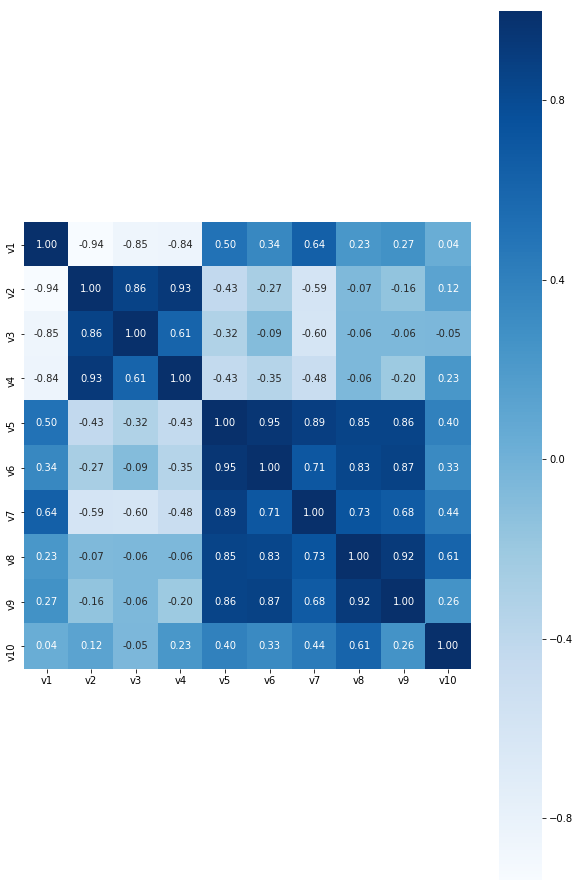

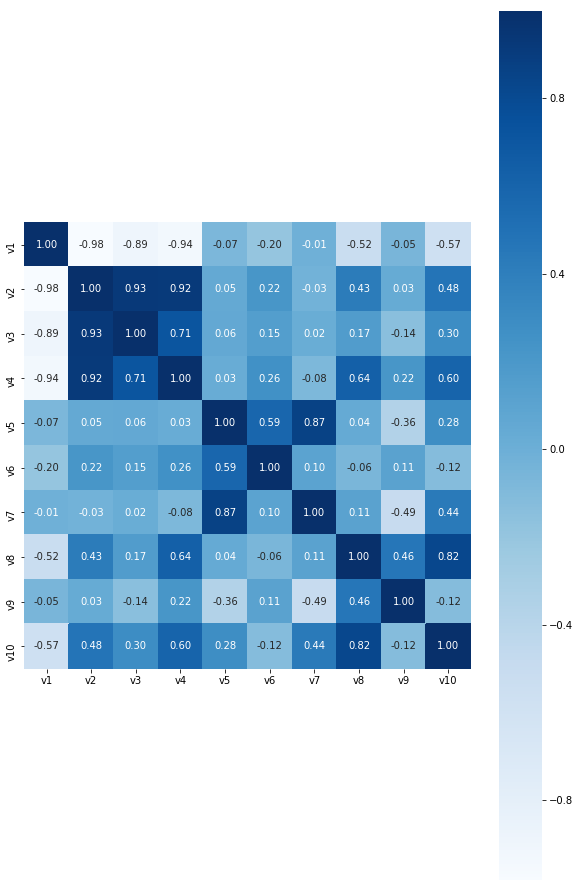

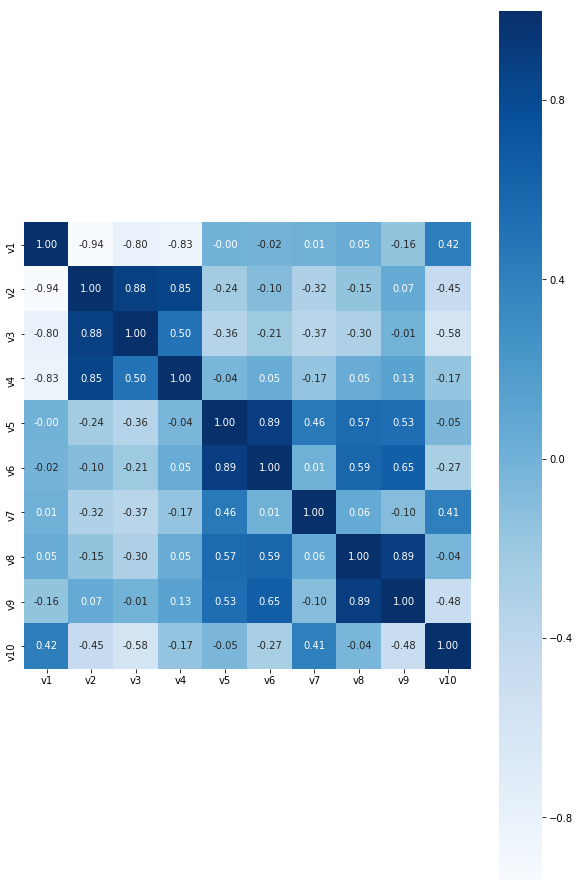

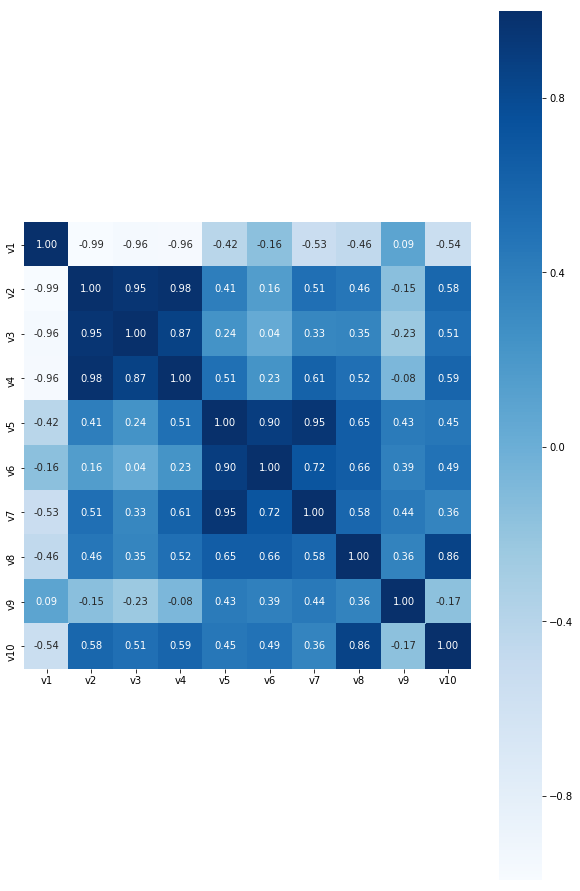

In [113]:

#2016
plt.figure(figsize=(10,16))
df_heatmap_2016 = sns.heatmap(corr_2016, cbar = True, annot = True,
                             annot_kws = {'size': 10}, fmt = '.2f',
                             square = True, cmap = 'Blues')

#2017
plt.figure(figsize=(10,16))
df_heatmap_2017 = sns.heatmap(corr_2017, cbar = True, annot = True,
                             annot_kws = {'size': 10}, fmt = '.2f',
                             square = True, cmap = 'Blues')

#2018
plt.figure(figsize=(10,16))
df_heatmap_2018 = sns.heatmap(corr_2018, cbar = True, annot = True,
                             annot_kws = {'size': 10}, fmt = '.2f',
                             square = True, cmap = 'Blues')

#2019
plt.figure(figsize=(10,16))
df_heatmap_2019 = sns.heatmap(corr_2019, cbar = True, annot = True,
                             annot_kws = {'size': 10}, fmt = '.2f',
                             square = True, cmap = 'Blues')
